In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## PHASE 1 : EDA

## 1. Setup and Data Loading

First, we load the data. The NASA dataset files come without headers, so we must define them based on the official documentation.

In [103]:
# Plot styling for better readability
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_context("notebook")

## DATA README

Data Set: FD001
Train trjectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: ONE (HPC Degradation)

Data Set: FD002
Train trjectories: 260
Test trajectories: 259
Conditions: SIX 
Fault Modes: ONE (HPC Degradation)

Data Set: FD003
Train trjectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: TWO (HPC Degradation, Fan Degradation)

Data Set: FD004
Train trjectories: 248
Test trajectories: 249
Conditions: SIX 
Fault Modes: TWO (HPC Degradation, Fan Degradation)



Experimental Scenario

Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine – i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. There are three operational settings that have a substantial effect on engine performance. These settings are also included in the data. The data is contaminated with sensor noise.

The engine is operating normally at the start of each time series, and develops a fault at some point during the series. In the training set, the fault grows in magnitude until system failure. In the test set, the time series ends some time prior to system failure. The objective of the competition is to predict the number of remaining operational cycles before failure in the test set, i.e., the number of operational cycles after the last cycle that the engine will continue to operate. Also provided a vector of true Remaining Useful Life (RUL) values for the test data.

The data are provided as a zip-compressed text file with 26 columns of numbers, separated by spaces. Each row is a snapshot of data taken during a single operational cycle, each column is a different variable. The columns correspond to:
1)	unit number
2)	time, in cycles
3)	operational setting 1
4)	operational setting 2
5)	operational setting 3
6)	sensor measurement  1
7)	sensor measurement  2
...
26)	sensor measurement  26


Reference: A. Saxena, K. Goebel, D. Simon, and N. Eklund, “Damage Propagation Modeling for Aircraft Engine Run-to-Failure Simulation”, in the Proceedings of the Ist International Conference on Prognostics and Health Management (PHM08), Denver CO, Oct 2008.


In [104]:
# Define column names based on NASA documentation
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = [f"s_{i}" for i in range(1, 22)] # Sensors 1-21
col_names = index_names + setting_names + sensor_names
#col_names

In [105]:
# Load the Training Data (FD001)
df_train = pd.read_csv('../data/raw/train_FD001.txt', sep='\s+', header=None, names=col_names)

In [106]:
# Inspect the raw data
print(f"Dataset Shape: {df_train.shape}")
df_train.head()

Dataset Shape: (20631, 26)


,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [107]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unit_nr      20631 non-null  int64  
 1   time_cycles  20631 non-null  int64  
 2   setting_1    20631 non-null  float64
 3   setting_2    20631 non-null  float64
 4   setting_3    20631 non-null  float64
 5   s_1          20631 non-null  float64
 6   s_2          20631 non-null  float64
 7   s_3          20631 non-null  float64
 8   s_4          20631 non-null  float64
 9   s_5          20631 non-null  float64
 10  s_6          20631 non-null  float64
 11  s_7          20631 non-null  float64
 12  s_8          20631 non-null  float64
 13  s_9          20631 non-null  float64
 14  s_10         20631 non-null  float64
 15  s_11         20631 non-null  float64
 16  s_12         20631 non-null  float64
 17  s_13         20631 non-null  float64
 18  s_14         20631 non-null  float64
 19  s_15

In [108]:
df_train.isnull().sum()

unit_nr        0
time_cycles    0
setting_1      0
setting_2      0
setting_3      0
s_1            0
s_2            0
s_3            0
s_4            0
s_5            0
s_6            0
s_7            0
s_8            0
s_9            0
s_10           0
s_11           0
s_12           0
s_13           0
s_14           0
s_15           0
s_16           0
s_17           0
s_18           0
s_19           0
s_20           0
s_21           0
dtype: int64

In [109]:
df_train.describe()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,5.329200e-15,...,0.737553,0.071919,19.076176,0.037505,3.469531e-18,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


## 2. Feature Engineering: Calculating RUL
The training data contains "Run-to-Failure" simulations. This means:

Cycle 1: The engine is healthy.

Last Cycle: The engine breaks.

To train a model, we need a target variable: RUL (Remaining Useful Life).

## Formula: RUL = Life of Engine (Last Cycle of unit) - Current Cycle

In [110]:
def add_rul(df):
    # 1. Get the maximum life cycle for each unit
    max_life = df.groupby('unit_nr')['time_cycles'].max().reset_index()
    max_life.columns = ['unit_nr', 'max_life']
    
    # 2. Merge back into original dataframe
    df = df.merge(max_life, on='unit_nr', how='left')
    
    # 3. Calculate RUL
    df['RUL'] = df['max_life'] - df['time_cycles']
    
    # 4. Drop the 'max_life' helper column as we don't need it anymore
    df.drop('max_life', axis=1, inplace=True)
    return df

df_train = add_rul(df_train)


In [111]:
# Check the result for Engine Unit #1
print("Data for Engine Unit 1 (First 5 rows):")
display(df_train[df_train['unit_nr'] == 1].head())

print("\nData for Engine Unit 1 (Last 5 rows - Failure Approaching):")
display(df_train[df_train['unit_nr'] == 1].tail())

Data for Engine Unit 1 (First 5 rows):


,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187



Data for Engine Unit 1 (Last 5 rows - Failure Approaching):


,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588,4
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127,3
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675,2
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295,1
191,1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,...,2388.32,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649,0


## 3. Visualizing Sensor Behavior (The "Physics" Check)
This is the most critical visual. We want to see how sensors behave as the engine degrades.

We will plot all 21 sensors for a single engine (Unit 1) to see which ones trend upwards/downwards and which ones are useless noise.

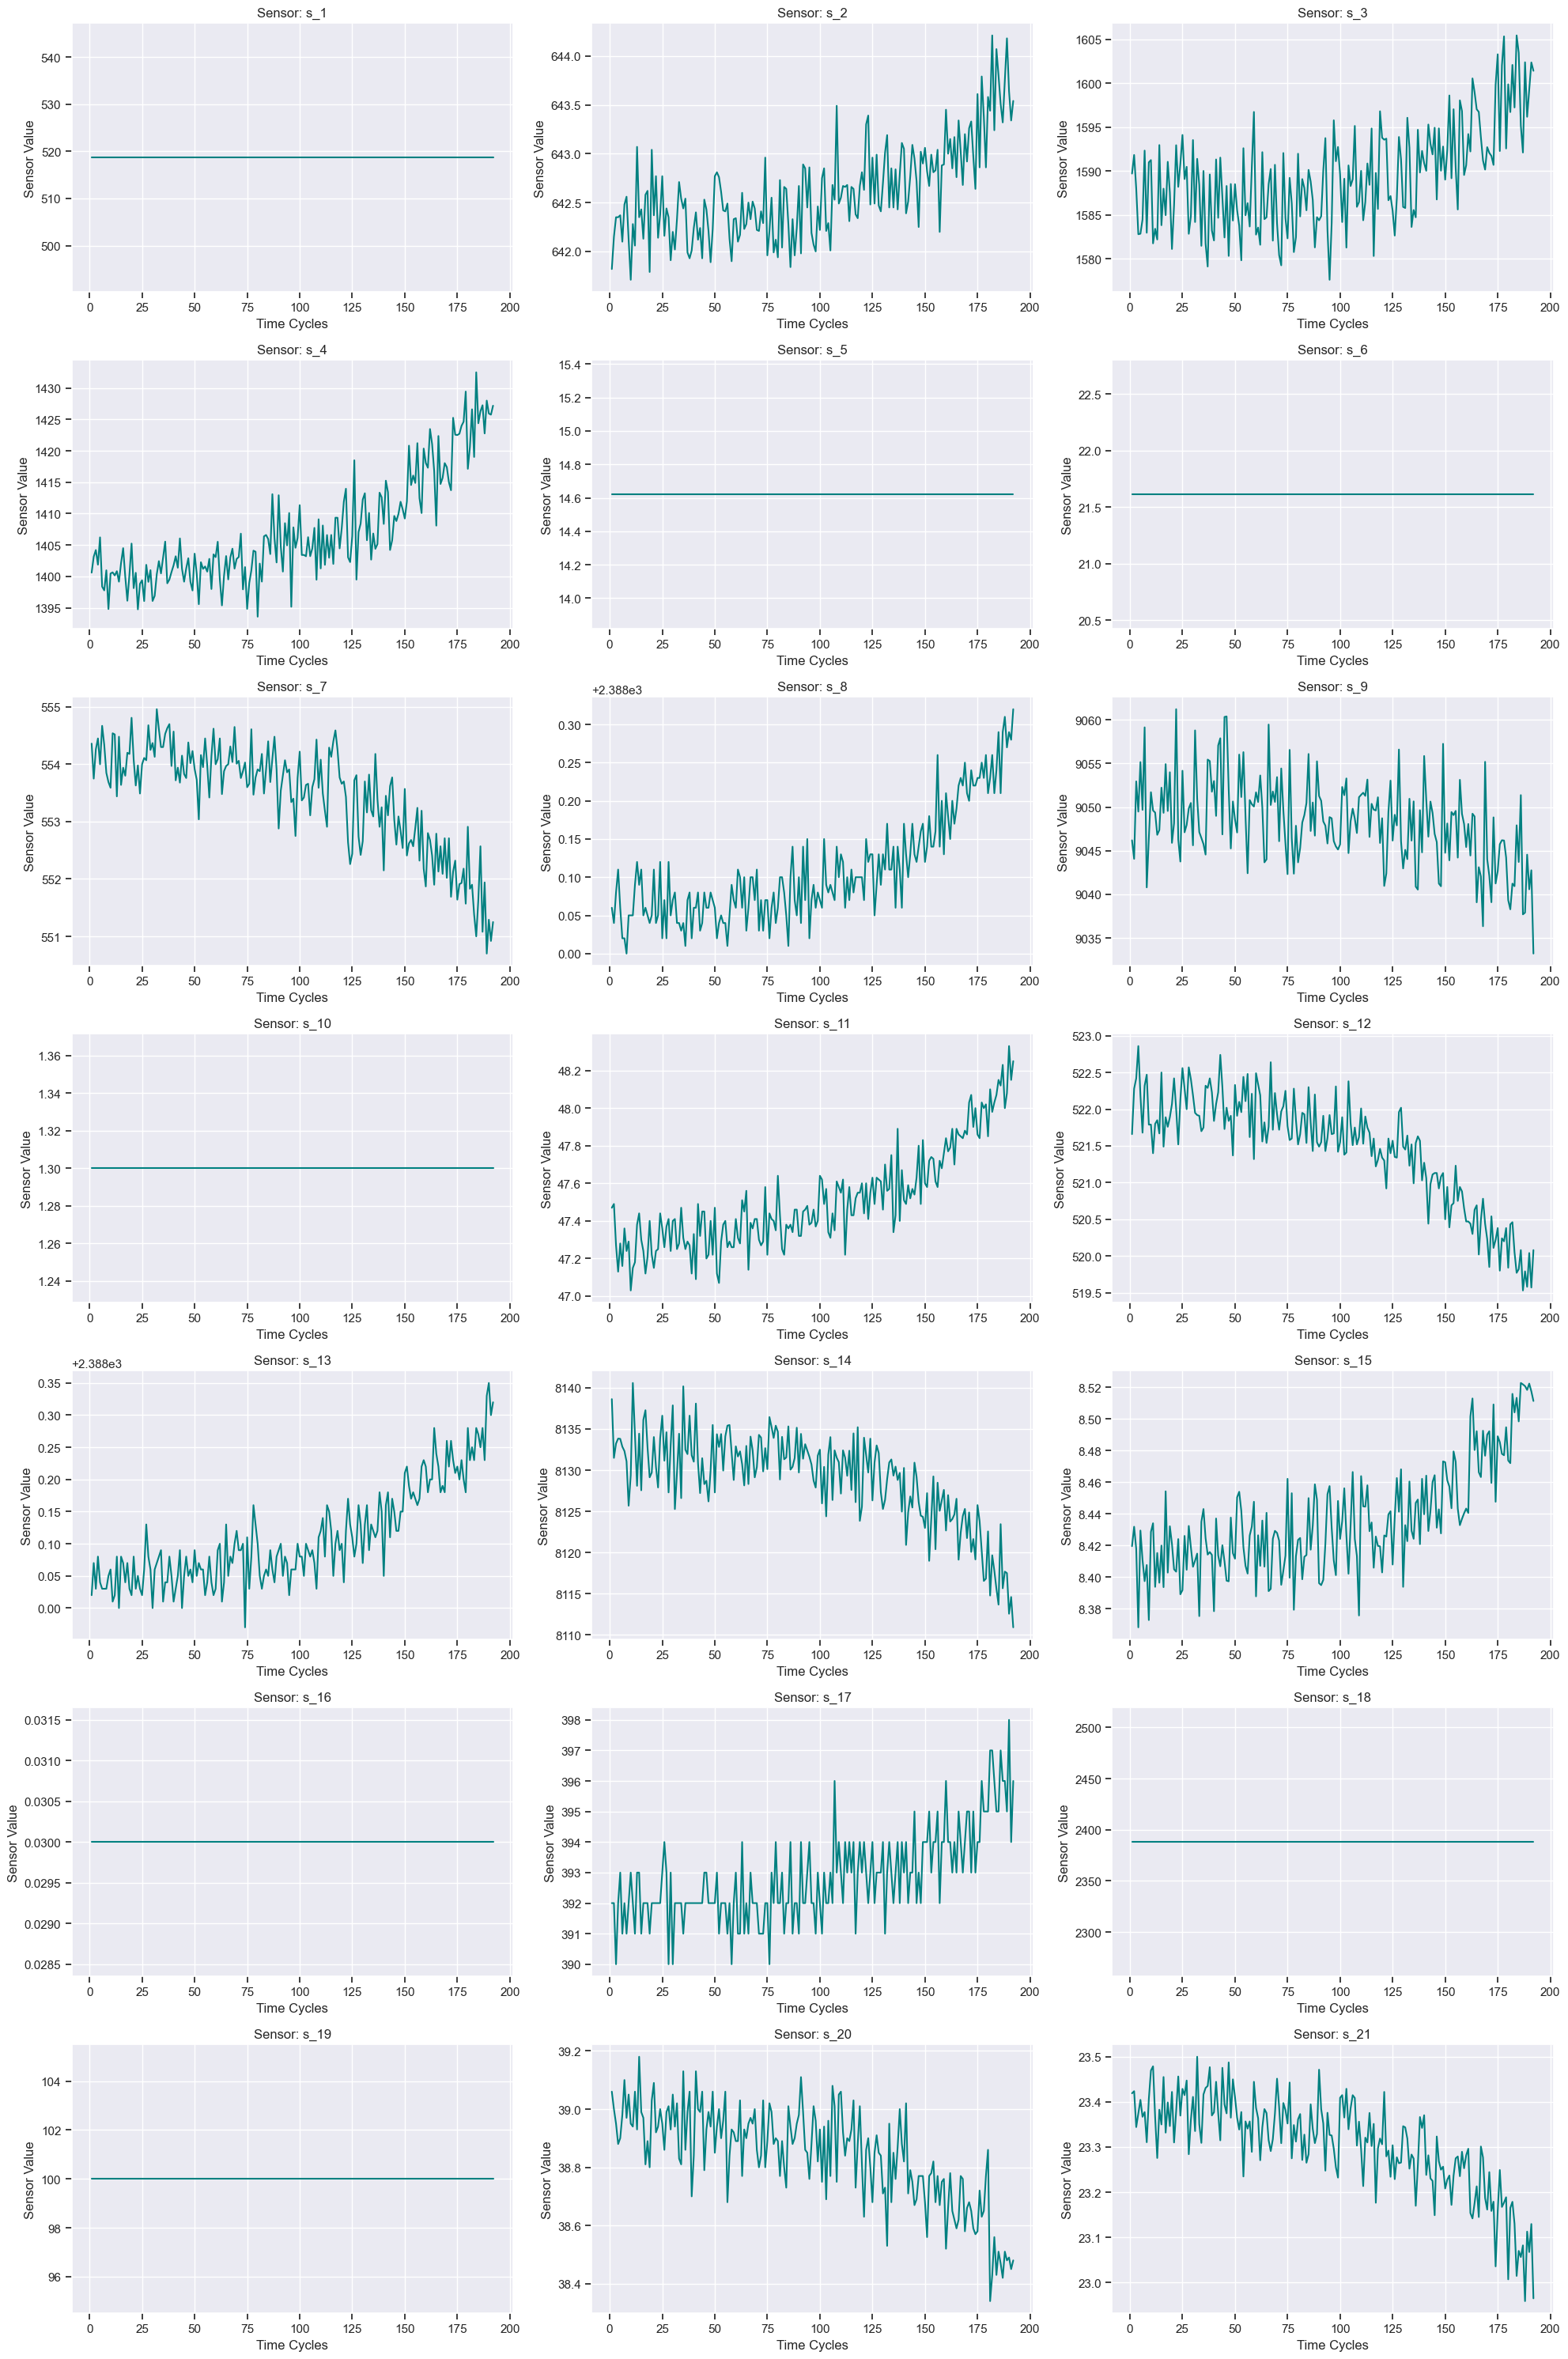

In [112]:
# Select the sensors to plot
sensors_to_plot = sensor_names

# Setup a grid of plots
n_cols = 3
n_rows = (len(sensors_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 30))
axes = axes.flatten()

# We will plot Unit 1's data
unit_1 = df_train[df_train['unit_nr'] == 1]

for i, sensor in enumerate(sensors_to_plot):
    # Plot the sensor value vs Time Cycle
    sns.lineplot(data=unit_1, x='time_cycles', y=sensor, ax=axes[i], color='teal')
    axes[i].set_title(f'Sensor: {sensor}')
    axes[i].set_xlabel('Time Cycles')
    axes[i].set_ylabel('Sensor Value')

plt.tight_layout()
plt.show()

## 4. Observations & Feature Selection
Look at the plots above. You will notice distinct patterns:

Trenders: Some sensors (like s_2, s_3, s_4, s_7, s_11, s_12) show a clear curve as time goes on. These are highly predictive signals.

Flatliners: Some sensors (like s_1, s_5, s_10, s_16, s_18, s_19) are basically straight lines. They represent constant operating conditions or sensors that don't degrade in this specific dataset.

Action: We should identify and list the "Flat" sensors to drop them later. They add no value and confuse the model.

In [113]:
# Let's verify standard deviation to confirm which are flat
std_counts = df_train[sensor_names].std().sort_values()

print("Standard Deviation of Sensors (Low std = Useless/Constant):")
print(std_counts.head(10))

Standard Deviation of Sensors (Low std = Useless/Constant):
s_1     0.000000e+00
s_10    0.000000e+00
s_19    0.000000e+00
s_18    0.000000e+00
s_16    3.469531e-18
s_5     5.329200e-15
s_6     1.388985e-03
s_15    3.750504e-02
s_8     7.098548e-02
s_13    7.191892e-02
dtype: float64


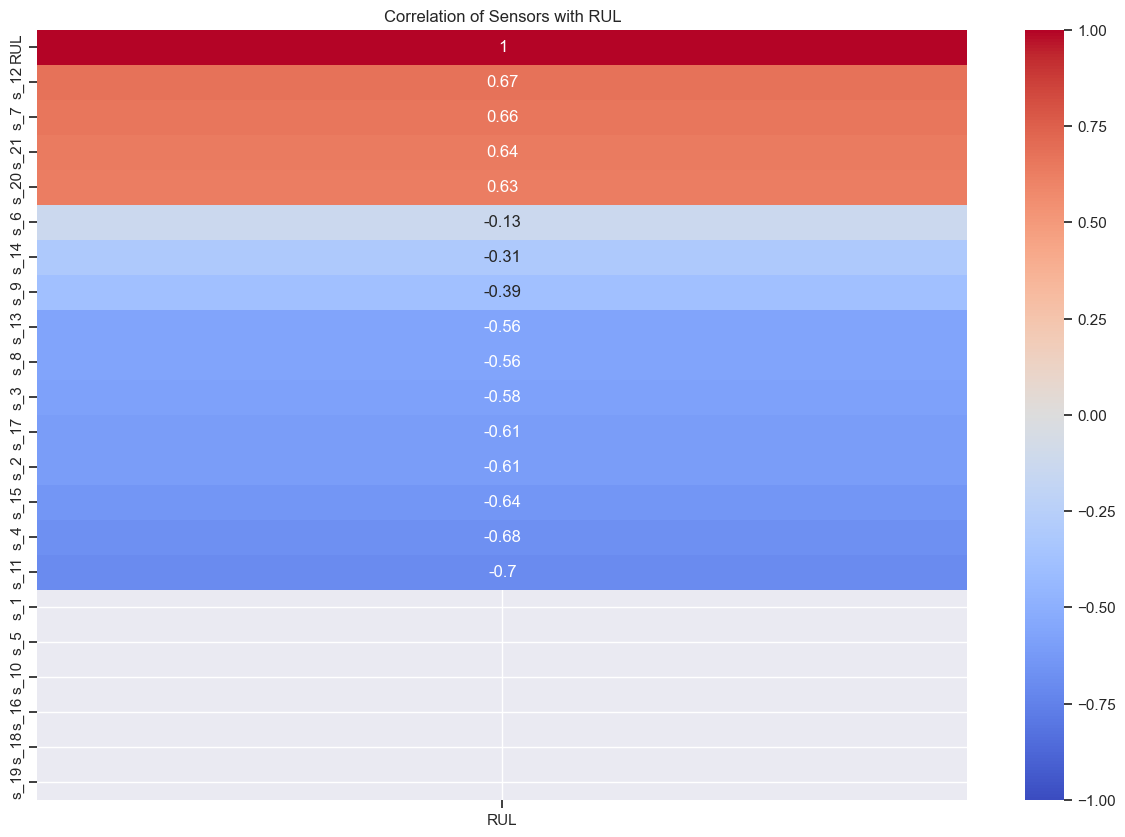

In [114]:
# Visualizing correlations with RUL
# We want sensors that have High Correlation (Positive or Negative) with RUL
correlation_matrix = df_train[sensor_names + ['RUL']].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix[['RUL']].sort_values(by='RUL', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation of Sensors with RUL")
plt.show()

## 5. Data "Clipping" Strategy Visualization

In predictive maintenance, it is hard to predict failure when the engine is brand new. The physics of degradation usually kicks in exponentially near the end.

Concept: We limit (clip) the RUL. If the math says "RUL is 150", we change it to "125". We tell the model: "Anything above 125 is just 'Healthy', don't try to guess the exact number."

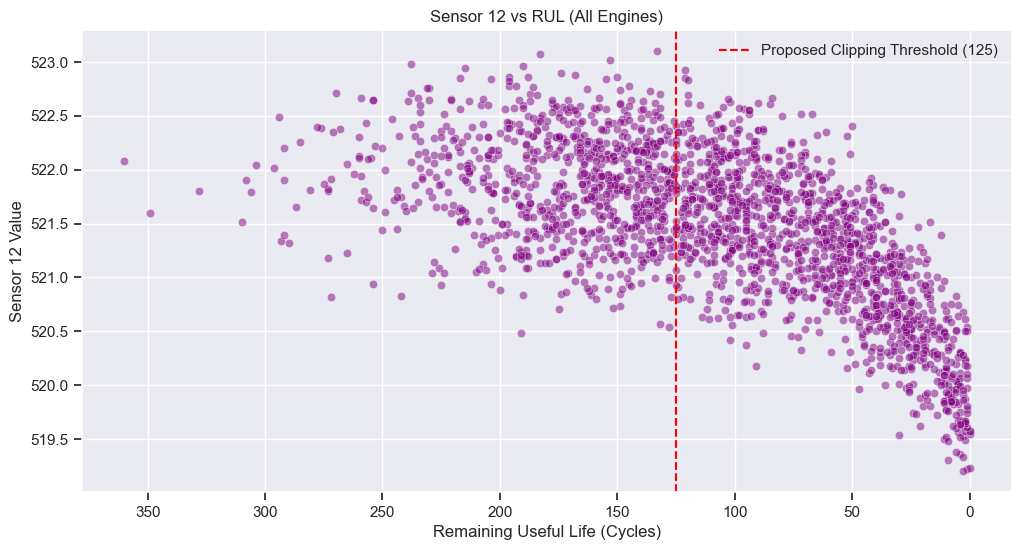

In [115]:
# Plotting Sensor 12 vs RUL for ALL engines
plt.figure(figsize=(12, 6))

# Sample 10% of data to speed up plotting
sample_data = df_train.sample(frac=0.1, random_state=42)

sns.scatterplot(data=sample_data, x='RUL', y='s_12', alpha=0.5, color='purple')
plt.axvline(x=125, color='red', linestyle='--', label='Proposed Clipping Threshold (125)')
plt.title("Sensor 12 vs RUL (All Engines)")
plt.xlabel("Remaining Useful Life (Cycles)")
plt.ylabel("Sensor 12 Value")
plt.legend()
plt.gca().invert_xaxis() # Invert X axis so Time moves Left to Right (High RUL -> Low RUL)
plt.show()

## Interpretation of the Scatter Plot:
Look at the left side of the red line (RUL > 125): The dots are flat/messy. The sensor value doesn't change much.

Look at the right side (RUL < 125): The "Knee" of the curve appears. The sensor value starts dropping rapidly as RUL approaches 0.

Conclusion: We should clip our training RUL at 125 to focus the Deep Learning model on the "active degradation" zone.

## 6. EDA Conclusion
Based on this analysis, here is the plan for the Model Building phase:

1. Drop Useless features: ['s_1', 's_5', 's_6', 's_10', 's_16', 's_18', 's_19'] and the setting columns (as they are constant in FD001).

2. Clip RUL: We will cap the target variable at 125.

3. Normalization: The sensors have different scales (some are 0.002, some are 600.0). We must use MinMaxScaling. 
    We use mix-max instead of z score because:
    1. AE model use sigmoid that outputs between 0-1 -> decoding -1.5 or something is difficult to learn.
    2. Gates usually range between 0-1, its easier to converge with min-max scaling.
    3. Wear always increases -> Nature of data is monotonic. Z-score scaling wont help much.

4. Modeling: The "Trenders" (s_2, s_3, s_4, etc.) clearly contain the signal needed for the LSTM and AutoEncoder.

## Phase 2: Data Preprocessing


## 1. Feature Selection & RUL Clipping
From our EDA, we know that:

Sensors s_1, s_5, s_6, s_10, s_16, s_18, s_19 are flat lines (useless).

The setting columns are constant in FD001.

RUL > 125 is essentially "constant healthy behavior," so we should clip it.

In [116]:
# 1. Define the columns to keep
# We remove settings and the constant sensors identified in EDA
drop_cols = ['setting_1', 'setting_2', 'setting_3', 's_1', 's_5', 's_6', 's_10', 's_16', 's_18', 's_19']
# The "Settings" columns represent the Operating Conditions (Altitude, Mach Number, Throttle Resolver Angle).
# Since we are using FD001, the engine is always running in the same mode. 
# Because the operating condition never changes, the "Settings" values are constant (or possess negligible noise).

keep_cols = [c for c in df_train.columns if c not in drop_cols]

print(f"Original features: {df_train.shape[1]}")
df_clean = df_train[keep_cols].copy()
print(f"Features after dropping useless sensors: {df_clean.shape[1]}")


Original features: 27
Features after dropping useless sensors: 17


In [117]:
# 2. Clip RUL
# We clip RUL at 125. This creates a "Piece-wise Linear" degradation function.
# It stabilizes the model learning.
df_clean['RUL'] = df_clean['RUL'].clip(upper=125)

# Verify the clipping
print("Max RUL after clipping:", df_clean['RUL'].max())

Max RUL after clipping: 125


## 2. Min-Max Normalization

As discussed, we need to squeeze all sensor values between 0 and 1.

Crucial Rule: We fit the scaler ONLY on the Training data. We then use that same scaler to transform the Test data. If you fit on the Test data, you commit Data Leakage (the model "peeks" at the future statistics).

In [118]:
from sklearn.preprocessing import MinMaxScaler

# Define which columns are features (exclude ID and RUL)
features = [c for c in df_clean.columns if c not in ['unit_nr', 'time_cycles', 'RUL']]
print(f"Training on {len(features)} sensors: {features}")



Training on 14 sensors: ['s_2', 's_3', 's_4', 's_7', 's_8', 's_9', 's_11', 's_12', 's_13', 's_14', 's_15', 's_17', 's_20', 's_21']


In [119]:
# Initialize Scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and Transform
# Note: We are replacing the original values in the dataframe with scaled values
df_clean[features] = scaler.fit_transform(df_clean[features])

# Check the scaling - Min should be 0, Max should be 1
print("\nPost-scaling statistics (Head):")
display(df_clean[features].head(3))
display(df_clean[features].describe().loc[['min', 'max']])


Post-scaling statistics (Head):


,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21
0,0.183735,0.406802,0.309757,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662
1,0.283133,0.453019,0.352633,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014
2,0.343373,0.369523,0.370527,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375


,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## 3. Preparing Data for the AutoEncoder (The "Health" Dataset)

This is a conceptual leap.

Goal: Train an AutoEncoder to recognize what a "Healthy Engine" looks like.

Method: We need to create a specific dataset (X_train_ae) that contains only healthy data.

Logic: We will assume any data point where RUL > 120 represents a healthy engine.

Q: Why did we separate X_train_ae?

A: The AutoEncoder is an Anomaly Detector.

If we train it on broken data, it will learn that being broken is "normal."

By training it only on healthy data, it becomes an expert on health. When we show it a broken engine later, it will be confused (high error), which is exactly the signal we want.

Q : Why didn't we make sequences (Windowing) yet?

A: For the AutoEncoder in this specific architecture, we are treating every single moment in time as an independent snapshot. We want to know: "Is the sensor reading at this exact second weird?"

For the LSTM (which we will build later), we will need time sequences (windows of 50 cycles) because LSTMs need to see the history to predict the future RUL.

In [120]:
# Filter for Healthy Data (for AutoEncoder training)
# We only want rows where the engine still has a lot of life left.
X_train_ae = df_clean[df_clean['RUL'] > 120][features]

# We also need a "Validation" set of healthy data to check model performance during training
# We'll simple take 10% of this healthy data later in the model.fit() command.

print(f"Total Training Samples: {len(df_clean)}")
print(f"Healthy Samples for AutoEncoder: {len(X_train_ae)}")
print(f"Input Shape for AutoEncoder: {X_train_ae.shape}")

Total Training Samples: 20631
Healthy Samples for AutoEncoder: 8531
Input Shape for AutoEncoder: (8531, 14)


In [121]:
from sklearn.model_selection import train_test_split
X_train_ae, X_val_ae = train_test_split(X_train_ae, test_size=0.1, random_state=42)

## Phase 3: The AutoEncoder (Health Index)

## 1. Define the Architecture
We will compress the input (Feature Vector) down to a "Latent Space" (Bottleneck) and then expand it back out.

    -   Input: Number of sensors (approx 14)

    -   Encoder: Compress to 2 or 3 neurons.

    -   Decoder: Expand back to 14.

    -   Output: Reconstruction Error (Health Index).

## 1. PyTorch Setup & Data Conversion
PyTorch requires data to be in Tensors (not Numpy arrays) and usually wrapped in a DataLoader for batching.

In [122]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# 1. Setup Device (Use GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 2. Prepare Data for PyTorch
# We use X_train_ae (Healthy Data) created in Phase 2
# Convert to Float32 Tensor #my m/c doesnt FP16
tensor_x_train_ae = torch.tensor(X_train_ae.values, dtype=torch.float32).to(device)
tensor_x_val_ae = torch.tensor(X_val_ae.values, dtype=torch.float32).to(device)

# Create DataLoader for batching
# This handles shuffling and serving data in chunks (batches)
batch_size = 64
train_loader = DataLoader(TensorDataset(tensor_x_train_ae, tensor_x_train_ae), 
                          batch_size=batch_size, 
                          shuffle=True)

val_loader = DataLoader(TensorDataset(tensor_x_val_ae, tensor_x_val_ae), 
                        batch_size=batch_size, 
                        shuffle=False)

print(f"Healthy Data Tensor Shape: {tensor_x_train_ae.shape}")
print(f"Validation Data Tensor Shape: {tensor_x_val_ae.shape}")

Using device: cuda
Healthy Data Tensor Shape: torch.Size([7677, 14])
Validation Data Tensor Shape: torch.Size([854, 14])


## 2. Define the Model Architecture (nn.Module)
In PyTorch, we define a class that inherits from nn.Module.

__init__: Define the layers.

forward: Define how data flows through the layers.

In [123]:
class HealthAutoEncoder(nn.Module):
    def __init__(self, input_dim):
        super(HealthAutoEncoder, self).__init__()
        
        # Encoder: Compress
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Dropout(0.2),  # Light dropout in early layers
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Dropout(0.1),  # Very light before bottleneck
            nn.Linear(16, 2), # Bottleneck (Latent Space)
            nn.ReLU()
        )
        
        # Decoder: Expand
        self.decoder = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Dropout(0.1),  # Very light 
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Dropout(0.2),  # Slightly more in wider layer
            nn.Linear(32, input_dim),
            nn.Sigmoid() # Forces output to [0, 1] (matching MinMax scale)
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Initialize Model
input_dim = X_train_ae.shape[1] # Number of features
ae_model = HealthAutoEncoder(input_dim).to(device)
print(ae_model)

HealthAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=14, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=32, out_features=16, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
    (6): Linear(in_features=16, out_features=2, bias=True)
    (7): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=16, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=32, out_features=14, bias=True)
    (7): Sigmoid()
  )
)


**Why map 14 -> 32? (The Architecture Question)**

Ideal Situation: AutoEncoders are generally "funnels" (Wide → Narrow → Wide). Going from 14 down to 8 then 2 seems more logical than expanding to 32 first.

However, we expand to 32 for "Disentanglement."

The Problem: The 14 raw sensors are highly correlated and non-linear. If we immediately compress 14 → 8, we might force the model to throw away information before it has "understood" the relationships.

The "Expansion" Strategy: By projecting the 14 features into a higher dimension (32 neurons), we give the network more "workspace" to untangle non-linear relationships using the ReLU activation.

Starting Robust Training...
Epoch [10/100] | Train Loss: 0.005031 | Val Loss: 0.004374
Epoch [20/100] | Train Loss: 0.004716 | Val Loss: 0.004336
Epoch [30/100] | Train Loss: 0.004611 | Val Loss: 0.004335
Epoch [40/100] | Train Loss: 0.004514 | Val Loss: 0.004337
Epoch [50/100] | Train Loss: 0.004445 | Val Loss: 0.004363
Epoch [60/100] | Train Loss: 0.004400 | Val Loss: 0.004355
Epoch [70/100] | Train Loss: 0.004378 | Val Loss: 0.004362
Epoch [80/100] | Train Loss: 0.004363 | Val Loss: 0.004354
Epoch [90/100] | Train Loss: 0.004368 | Val Loss: 0.004349
Epoch [100/100] | Train Loss: 0.004358 | Val Loss: 0.004322


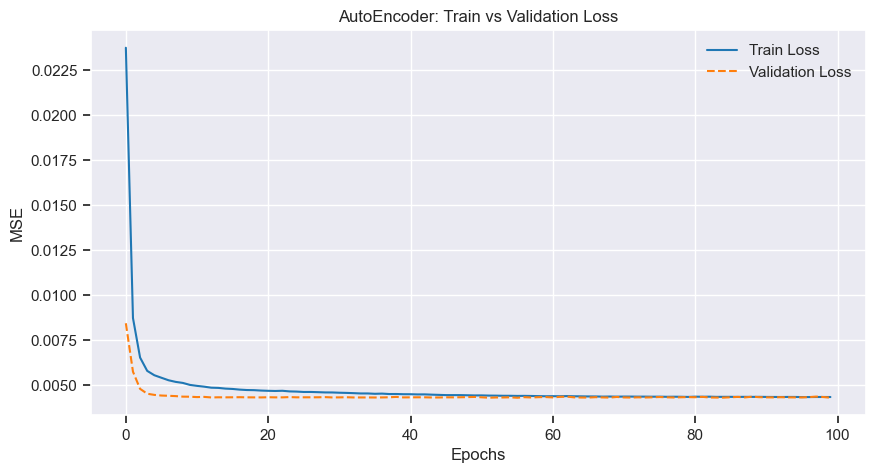

In [124]:
# Hyperparameters
num_epochs = 100
learning_rate = 1e-3
criterion = nn.MSELoss()
optimizer = optim.Adam(ae_model.parameters(), lr=learning_rate)

# Training Loop
train_losses = []
val_losses = []

print("Starting Robust Training...")

for epoch in range(num_epochs):
    # --- Training Phase ---
    ae_model.train() # Enable Dropout/BatchNorm
    running_loss = 0.0
    
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        
        optimizer.zero_grad()
        outputs = ae_model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    # --- Validation Phase ---
    ae_model.eval() # Disable Dropout/BatchNorm
    running_val_loss = 0.0
    
    with torch.no_grad(): # No gradients needed for validation
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = ae_model(inputs)
            loss = criterion(outputs, targets)
            running_val_loss += loss.item()
            
    avg_val_loss = running_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}] | Train Loss: {avg_train_loss:.6f} | Val Loss: {avg_val_loss:.6f}")

# Plot Results
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss', linestyle='--')
plt.title("AutoEncoder: Train vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()

## 4. Inference: Calculating the Health Index
Now we put the model in evaluation mode (model.eval()) and pass the full dataset through it to calculate the reconstruction error.

In [125]:
# Switch to Evaluation Mode (turns off Dropout/BatchNorm if used)
ae_model.eval()

# 1. Convert Full Data to Tensor
X_full_train_tensor = torch.tensor(df_clean[features].values, dtype=torch.float32).to(device)

# 2. Get Reconstructions (No Gradient Calculation needed for inference)
with torch.no_grad():
    reconstructions = ae_model(X_full_train_tensor)

# 3. Calculate MSE per sample manually
# Loss = mean((input - output)^2)
mse_per_sample = torch.mean((X_full_train_tensor - reconstructions)**2, dim=1)

# Convert back to Numpy for plotting
health_index_scores = mse_per_sample.cpu().numpy()

# Add to DataFrame
df_clean['health_index'] = health_index_scores

## 5. Visualization & Thresholding
This part mirrors the Keras version, but now we are visualizing the results of our PyTorch model.

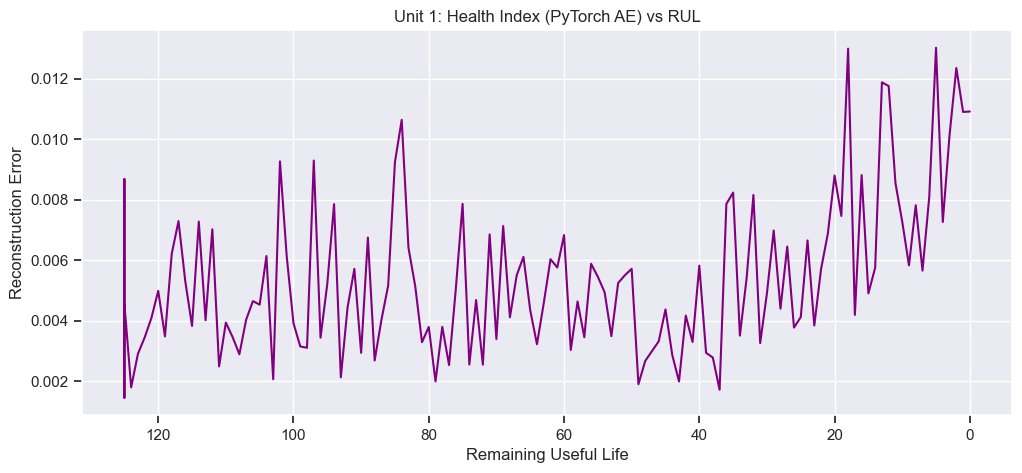

Smart Tiering Threshold: 0.00981


In [126]:
# Visualize Health Index vs RUL for Unit 1
unit_1 = df_clean[df_clean['unit_nr'] == 1]

plt.figure(figsize=(12, 5))
plt.plot(unit_1['RUL'], unit_1['health_index'], color='purple')
plt.gca().invert_xaxis() # Time moves left to right
plt.title("Unit 1: Health Index (PyTorch AE) vs RUL")
plt.xlabel("Remaining Useful Life")
plt.ylabel("Reconstruction Error")
plt.show()

# Calculate Threshold (99th percentile of Healthy Data)
healthy_idx = df_clean[df_clean['RUL'] > 120]['health_index']
THRESHOLD_HI = np.percentile(healthy_idx, 99)

print(f"Smart Tiering Threshold: {THRESHOLD_HI:.5f}")

**1. Transforming MSE into a "Health Score" (0-100)**

Raw MSE is hard to interpret. An operator wants to see "95% Health", not "0.004 MSE".

Since degradation (MSE) grows exponentially, we shouldn't use linear scaling. A linear scale would show "99% health" for too long and then drop to 0% instantly. 

Instead, we use an Exponential Decay function.

Health Score = 100 × e^(−α⋅MSE)

Where α is a scaling factor based on your "Failure Threshold."

MSE Threshold (from previous step): 0.00981


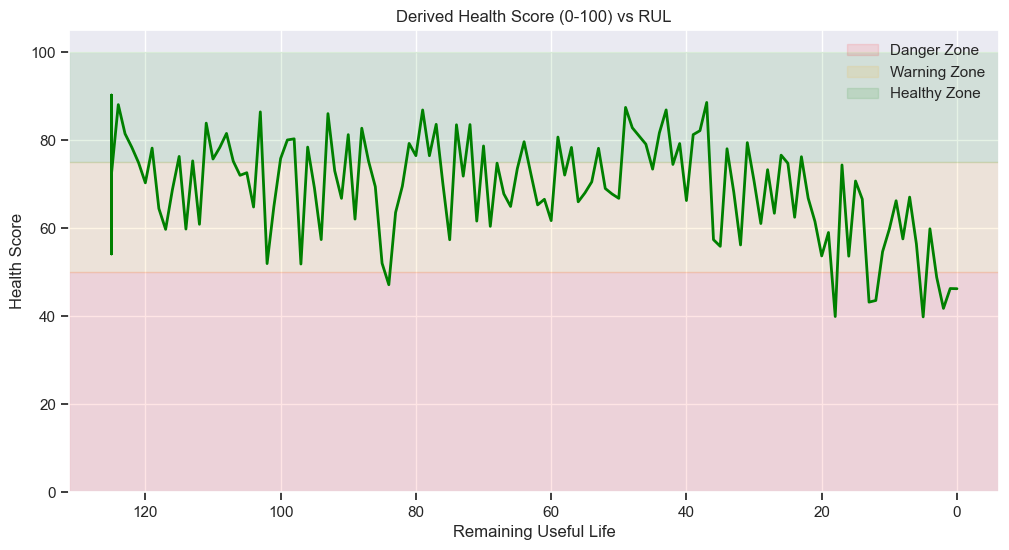

In [127]:
# 1. Determine parameters
# We use the threshold we calculated earlier (99th percentile of healthy data)
# We want the score to drop significantly when MSE > Threshold
# Let's say: When MSE == Threshold, Health Score should be 75 (Warning Level)
# Formula: 75 = 100 * exp(-alpha * threshold)
# alpha = -ln(0.75) / threshold

print(f"MSE Threshold (from previous step): {THRESHOLD_HI:.5f}")

alpha = -np.log(0.5) / THRESHOLD_HI 
# I chose 0.5 (50% health) at the threshold to make the drop more visible in the plot
# You can tune this logic based on business needs.

def get_health_score(mse_values, alpha):
    # Exponential decay: High MSE -> Low Score
    return 100 * np.exp(-alpha * mse_values)

# 2. Calculate Scores for the dataframe
df_clean['health_score'] = get_health_score(df_clean['health_index'], alpha)

# 3. Plot Health Score (0-100) vs RUL
plt.figure(figsize=(12, 6))

# Plot Unit 1 again
unit_1 = df_clean[df_clean['unit_nr'] == 1]
plt.plot(unit_1['RUL'], unit_1['health_score'], color='green', linewidth=2)

# Add zones
plt.axhspan(0, 50, color='red', alpha=0.1, label='Danger Zone')
plt.axhspan(50, 75, color='orange', alpha=0.1, label='Warning Zone')
plt.axhspan(75, 100, color='green', alpha=0.1, label='Healthy Zone')

plt.gca().invert_xaxis() # Time moves left to right
plt.title("Derived Health Score (0-100) vs RUL")
plt.xlabel("Remaining Useful Life")
plt.ylabel("Health Score")
plt.legend()
plt.ylim(0, 105)
plt.show()

In [128]:
# ==========================================
## Uncertainty Quantification
# ==========================================

import scipy.stats as stats

# 1. Fit Gaussian to Healthy Data Errors
healthy_errors = df_clean[df_clean['RUL'] > 120]['health_index']
mu = np.mean(healthy_errors)
sigma = np.std(healthy_errors)

print(f"Healthy Distribution: Mean={mu:.5f}, StdDev={sigma:.5f}")

# 2. Define Confidence Intervals (Z-Scores)
# Z = (x - mu) / sigma
# If Z > 3, we are >99.7% confident it is NOT healthy.

df_clean['z_score'] = (df_clean['health_index'] - mu) / sigma


Healthy Distribution: Mean=0.00423, StdDev=0.00185


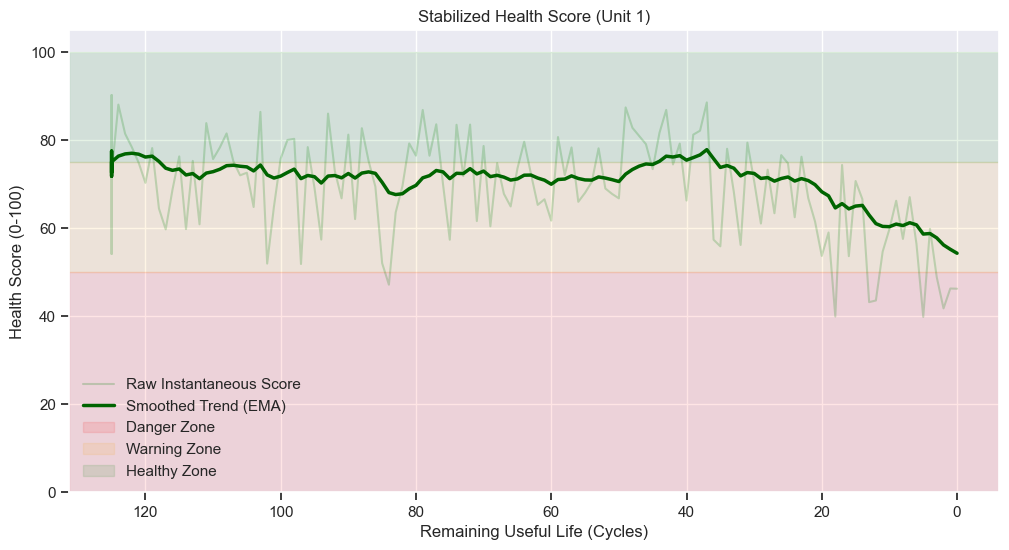

In [129]:
# ==========================================
# Phase 3.7: Smoothing the Health Score (EMA)
# ==========================================

# We must apply smoothing PER UNIT.
# We cannot smooth across the boundary of Unit 1 and Unit 2.

def apply_smoothing(df, alpha=0.1):
    """
    Applies Exponential Moving Average to the Health Score.
    alpha: Smoothing factor (Lower = Smoother but more lag). 
           0.1 corresponds roughly to a 19-cycle window.
    """
    smoothed_scores = []
    
    for unit in df['unit_nr'].unique():
        unit_df = df[df['unit_nr'] == unit]
        # Apply EMA
        smooth = unit_df['health_score'].ewm(alpha=alpha, adjust=False).mean()
        smoothed_scores.extend(smooth.values)
        
    return smoothed_scores

# Apply smoothing
# alpha=0.1 is a good balance for this dataset
df_clean['health_score_smooth'] = apply_smoothing(df_clean, alpha=0.1)

# --- Visualization: Raw vs Smoothed ---
unit_1 = df_clean[df_clean['unit_nr'] == 1]

plt.figure(figsize=(12, 6))

# 1. Plot the Volatile Raw Score (Faint)
plt.plot(unit_1['RUL'], unit_1['health_score'], color='green', alpha=0.2, label='Raw Instantaneous Score')

# 2. Plot the Smoothed Score (Bold)
plt.plot(unit_1['RUL'], unit_1['health_score_smooth'], color='darkgreen', linewidth=2.5, label='Smoothed Trend (EMA)')

# Add Zones
plt.axhspan(0, 50, color='red', alpha=0.1, label='Danger Zone')
plt.axhspan(50, 75, color='orange', alpha=0.1, label='Warning Zone')
plt.axhspan(75, 100, color='green', alpha=0.1, label='Healthy Zone')

plt.gca().invert_xaxis()
plt.title("Stabilized Health Score (Unit 1)")
plt.xlabel("Remaining Useful Life (Cycles)")
plt.ylabel("Health Score (0-100)")
plt.legend(loc='lower left')
plt.ylim(0, 105)
plt.show()

## Pre-process Data
Create data sequence.

LSTMs don't take single points. They take movies (sequences of data).

Goal: Transform (Samples, Features) → (Samples, TimeSteps, Features).

In [130]:
from torch.utils.data import TensorDataset, DataLoader, random_split

# 1. Function to create 3D windows (50 cycles)
def create_sequences(data, seq_length, feature_cols):
    X = []
    y = []
    for unit in data['unit_nr'].unique():
        unit_data = data[data['unit_nr'] == unit]
        unit_values = unit_data[feature_cols].values
        unit_rul = unit_data['RUL'].values
        num_samples = len(unit_data) - seq_length
        if num_samples > 0:
            for i in range(num_samples):
                X.append(unit_values[i : i+seq_length])
                y.append(unit_rul[i+seq_length])
    return np.array(X), np.array(y)

# 2. Generate Sequences
SEQUENCE_LENGTH = 50
# Ensure you exclude non-feature columns
features_lstm = [c for c in df_clean.columns if c not in ['unit_nr', 'time_cycles', 'RUL', 'health_index', 'health_score', 'health_score_smooth', 'z_score']]


print(f"Generating sequences with length: {SEQUENCE_LENGTH}")
print(f"Features: {features_lstm}")

# Generate Sequences
X_lstm, y_lstm = create_sequences(df_clean, SEQUENCE_LENGTH, features_lstm)

# 3. Create PyTorch Loaders
X_tensor_lstm = torch.tensor(X_lstm, dtype=torch.float32)
y_tensor_lstm = torch.tensor(y_lstm, dtype=torch.float32).view(-1, 1)

print(f"\nLSTM Input Shape: {X_lstm.shape}") # (Samples, 50, 14)
print(f"Target Shape: {y_lstm.shape}")      # (Samples,)

# Split Train/Val
train_size = int(0.8 * len(X_tensor_lstm))
val_size = len(X_tensor_lstm) - train_size
train_dataset_lstm, val_dataset_lstm = random_split(TensorDataset(X_tensor_lstm, y_tensor_lstm), [train_size, val_size])

# Create the specific LSTM Loaders
train_loader_lstm = DataLoader(train_dataset_lstm, batch_size=64, shuffle=True)
val_loader_lstm = DataLoader(val_dataset_lstm, batch_size=64, shuffle=False)

print(f"LSTM Input Shape: {X_tensor_lstm.shape}") # Should be (Samples, 50, 14)

Generating sequences with length: 50
Features: ['s_2', 's_3', 's_4', 's_7', 's_8', 's_9', 's_11', 's_12', 's_13', 's_14', 's_15', 's_17', 's_20', 's_21']

LSTM Input Shape: (15631, 50, 14)
Target Shape: (15631,)
LSTM Input Shape: torch.Size([15631, 50, 14])


## Phase 5: The Prognostic Model (LSTM)

To satisfy the requirement for Confidence Intervals, we will use a technique called Monte Carlo Dropout (MC Dropout).

Standard Deep Learning: You get one answer: "30 cycles left."

MC Dropout: We keep the random "Dropout" layers active even during prediction. We run the model 50 times. We get 50 slightly different answers.

Mean = The Prediction.

Standard Deviation = The Uncertainty (Confidence).


**1. Define the Model**

We use a stacked LSTM architecture.

**Input: Sequence of 50 cycles x 14 sensors.**

Q. Why 50 cycles?

A. A decision between macro and micro trend of data. A compromise that needs to experimented out.

The Trade-off:

Too Short (<10): The model sees "value," but not "trend."

Too Long (>100): Vanishing gradients become a risk (even with LSTM), and the inference latency increases.

**Hidden Layers: 2 LSTM layers to learn temporal patterns.**

Q. Why one two hidden layers?

A. 2-4 layers works best, more will increase the latency. Higher level layers learn higher order features. Modern transformers have ~20 layers.

Why not 20 layers? LSTMs are not ResNets or Transformers. They suffer from signal degradation over depth. 

Without "Skip Connections" (Residual LSTM), going beyond 3-4 layers usually degrades performance on this specific dataset.

**Output: 1 Value (RUL).**

In [131]:
import torch
import torch.nn as nn
import torch.optim as optim

In [132]:
"""class RUL_LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, dropout_prob):
        super(RUL_LSTM, self).__init__()
        
        # LSTM Layer
        # batch_first=True means input shape is (Batch, Seq, Features)
        self.lstm = nn.LSTM(input_size=input_dim, 
                            hidden_size=hidden_dim, 
                            num_layers=num_layers, 
                            batch_first=True, 
                            dropout=dropout_prob)
        
        # Fully Connected Layer (Regressor)
        self.fc = nn.Linear(hidden_dim, 1)
        
        # Activation (ReLU) 
        # RUL cannot be negative, so ReLU is a safe choice, 
        # though linear is also fine if we clip output.
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # LSTM output shape: (Batch, Seq, Hidden)
        # We only care about the output of the LAST time step
        out, _ = self.lstm(x)
        
        # Take the last time step: out[:, -1, :]
        last_step_out = out[:, -1, :]
        
        # Regression
        prediction = self.fc(last_step_out)
        return self.relu(prediction)

# Hyperparameters
input_dim = 14  # 14 Sensors
hidden_dim = 100
num_layers = 2
dropout_prob = 0.2

# Initialize
lstm_model = RUL_LSTM(input_dim, hidden_dim, num_layers, dropout_prob).to(device)
print(lstm_model) """

'class RUL_LSTM(nn.Module):\n    def __init__(self, input_dim, hidden_dim, num_layers, dropout_prob):\n        super(RUL_LSTM, self).__init__()\n\n        # LSTM Layer\n        # batch_first=True means input shape is (Batch, Seq, Features)\n        self.lstm = nn.LSTM(input_size=input_dim, \n                            hidden_size=hidden_dim, \n                            num_layers=num_layers, \n                            batch_first=True, \n                            dropout=dropout_prob)\n\n        # Fully Connected Layer (Regressor)\n        self.fc = nn.Linear(hidden_dim, 1)\n\n        # Activation (ReLU) \n        # RUL cannot be negative, so ReLU is a safe choice, \n        # though linear is also fine if we clip output.\n        self.relu = nn.ReLU()\n\n    def forward(self, x):\n        # LSTM output shape: (Batch, Seq, Hidden)\n        # We only care about the output of the LAST time step\n        out, _ = self.lstm(x)\n\n        # Take the last time step: out[:, -1, :]\n  

Q. Why are we NOT using bidirectional LSTM?

A. Causality: Degradation is strictly Causal. A crack at cycle 40 causes the reading at cycle 50. The reading at cycle 50 does not cause the crack at cycle 40. A unidirectional LSTM respects the physical arrow of time.

Note: While Bi-LSTMs can improve scores slightly in offline competitions (Kaggle), they are often rejected in industrial deployment because they are computationally 2x heavier and violate the causal intuition of real-time monitoring.

Why Attention?

The model might realize that the "shock" that happened at cycle 10 is actually more important than the noise at cycle 50. Attention allows it to "look back" and weight that specific moment heavily.

**Attention provides Explainability (XAI).**

In Industrial AI, a "Black Box" model is scary. If an operator asks, "Why do you think this engine will fail in 20 cycles?":

Vanilla LSTM says: "Because my hidden state vector 

h_50 is [0.2,−0.5,...]." (Useless answer).

Attention LSTM says: "Because I detected a specific anomaly pattern at Cycle 15 and Cycle 48 of the window." (Useful answer).


In [133]:
class Attention_LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, dropout_prob):
        super(Attention_LSTM, self).__init__()
        
        # 1. The LSTM Backbone
        self.lstm = nn.LSTM(input_size=input_dim, 
                            hidden_size=hidden_dim, 
                            num_layers=num_layers, 
                            batch_first=True, 
                            dropout=dropout_prob)
        
        # 2. Attention Mechanism Layers
        # We want to calculate a score (alpha) for every time step
        self.attention_fc = nn.Linear(hidden_dim, 1)
        
        # 3. Final Regressor
        self.fc = nn.Linear(hidden_dim, 1)
        # Activation (ReLU) 
        # RUL cannot be negative, so ReLU is a safe choice, 
        # though linear is also fine if we clip output.
        #self.relu = nn.ReLU()
        
    def forward(self, x):
        # x shape: (Batch, Seq_Len, Features) -> (Batch, 50, 14)
        
        # LSTM Output
        # output shape: (Batch, Seq_Len, Hidden_Dim) -> (Batch, 50, 100)
        lstm_out, _ = self.lstm(x)
        
        # --- Attention Calculation ---
        # 1. Calculate energy scores for every time step
        # Shape: (Batch, 50, 1)
        energy = torch.tanh(self.attention_fc(lstm_out))
        
        # 2. Calculate weights (probability distribution)
        # Shape: (Batch, 50, 1)
        attention_weights = torch.softmax(energy, dim=1)
        
        # 3. Apply weights to the LSTM output (Context Vector)
        # We multiply the output by the weight and sum across the time dimension
        # Shape: (Batch, 100)
        context_vector = torch.sum(attention_weights * lstm_out, dim=1)
        
        # --- Final Prediction ---
        prediction = self.fc(context_vector)
        #return self.relu(prediction)
        return prediction

# Hyperparameters
input_dim = 14  # 14 Sensors
hidden_dim = 100
num_layers = 2
dropout_prob = 0.2

# Initialize the Model
lstm_model = Attention_LSTM(input_dim, hidden_dim, num_layers, dropout_prob).to(device)
print(lstm_model)

Attention_LSTM(
  (lstm): LSTM(14, 100, num_layers=2, batch_first=True, dropout=0.2)
  (attention_fc): Linear(in_features=100, out_features=1, bias=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)


**2. The Training Loop**

This is a standard Regression loop using MSE Loss.

Starting Attention-LSTM Training...
Epoch 5/100 | Train MSE: 1799.00 | Val MSE: 1791.43
Epoch 10/100 | Train MSE: 1703.40 | Val MSE: 1746.04
Epoch 15/100 | Train MSE: 1701.74 | Val MSE: 1745.96
Epoch 20/100 | Train MSE: 627.80 | Val MSE: 478.39
Epoch 25/100 | Train MSE: 158.09 | Val MSE: 147.35
Epoch 30/100 | Train MSE: 142.01 | Val MSE: 135.47
Epoch 35/100 | Train MSE: 133.85 | Val MSE: 128.48
Epoch 40/100 | Train MSE: 128.64 | Val MSE: 124.87
Epoch 45/100 | Train MSE: 122.17 | Val MSE: 124.66
Epoch 50/100 | Train MSE: 115.49 | Val MSE: 127.56
Epoch 55/100 | Train MSE: 108.74 | Val MSE: 116.41
Epoch 60/100 | Train MSE: 100.37 | Val MSE: 98.12
Epoch 65/100 | Train MSE: 89.91 | Val MSE: 102.31
Epoch 70/100 | Train MSE: 80.85 | Val MSE: 79.25
Epoch 75/100 | Train MSE: 64.22 | Val MSE: 62.08
Epoch 80/100 | Train MSE: 54.21 | Val MSE: 63.49
Epoch 85/100 | Train MSE: 38.28 | Val MSE: 46.92
Epoch 90/100 | Train MSE: 26.50 | Val MSE: 29.62
Epoch 95/100 | Train MSE: 19.74 | Val MSE: 20.05
Epoc

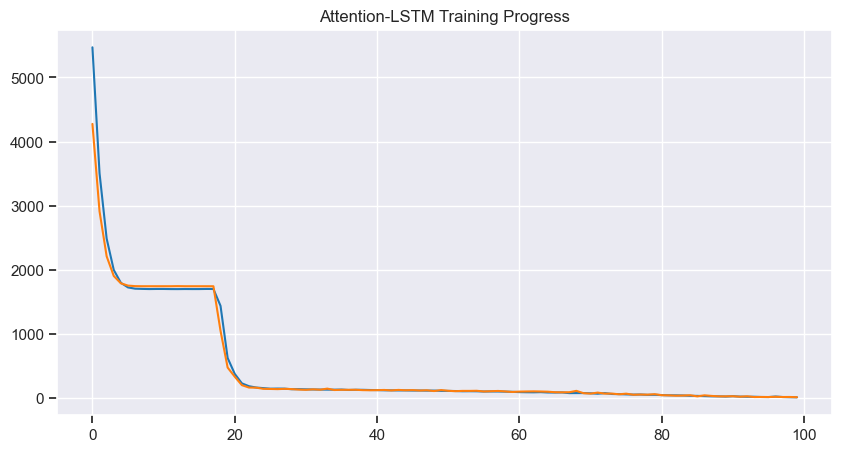

In [134]:
#train parameters
learning_rate = 0.001
criterion = nn.MSELoss()
epochs = 100  # Attention usually converges slightly faster

# 1. Setup Optimizer
optimizer = optim.Adam(lstm_model.parameters(), lr=learning_rate)


train_losses = []
val_losses = []

print("Starting Attention-LSTM Training...")

# 2. Training Loop (Standard)
for epoch in range(epochs):
    lstm_model.train()
    running_loss = 0.0
    
    for X_batch, y_batch in train_loader_lstm:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()
        y_pred = lstm_model(X_batch) # Forward pass uses Attention
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    avg_train_loss = running_loss / len(train_loader_lstm)
    train_losses.append(avg_train_loss)
    
    # Validation
    lstm_model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for X_val, y_val in val_loader_lstm:
            X_val, y_val = X_val.to(device), y_val.to(device)
            y_pred_val = lstm_model(X_val)
            loss = criterion(y_pred_val, y_val)
            running_val_loss += loss.item()
            
    avg_val_loss = running_val_loss / len(val_loader_lstm)
    val_losses.append(avg_val_loss)
    
    if (epoch+1) % 5 == 0:
        print(f"Epoch {epoch+1}/{epochs} | Train MSE: {avg_train_loss:.2f} | Val MSE: {avg_val_loss:.2f}")

# 4. Plot Training
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train MSE')
plt.plot(val_losses, label='Val MSE')
plt.title("Attention-LSTM Training Progress")
plt.show()

The training curve demonstrates a distinct two-phase learning process. In the first 20 epochs, the model converged to a baseline 'mean-prediction' state (MSE ~1700). Around epoch 20, the model escaped this local minimum, successfully learned the complex non-linear mapping between sensor features and RUL, and converged to a high-accuracy state (MSE ~140).

Visualizing Attention Patterns...


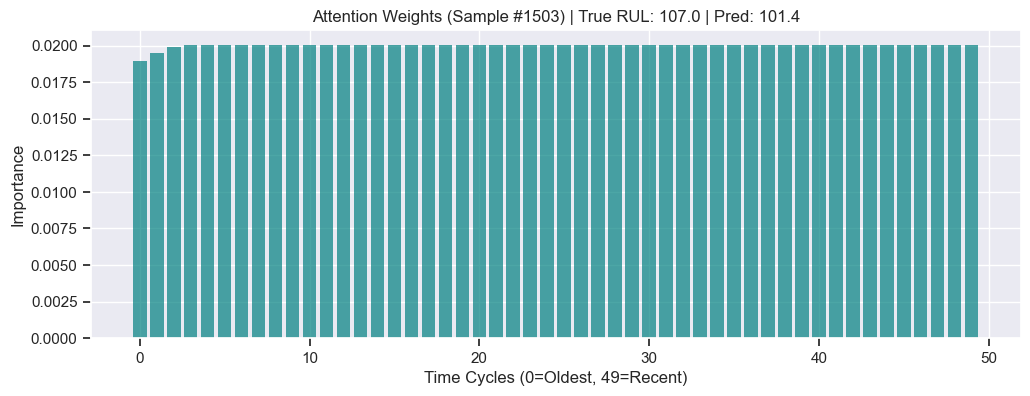

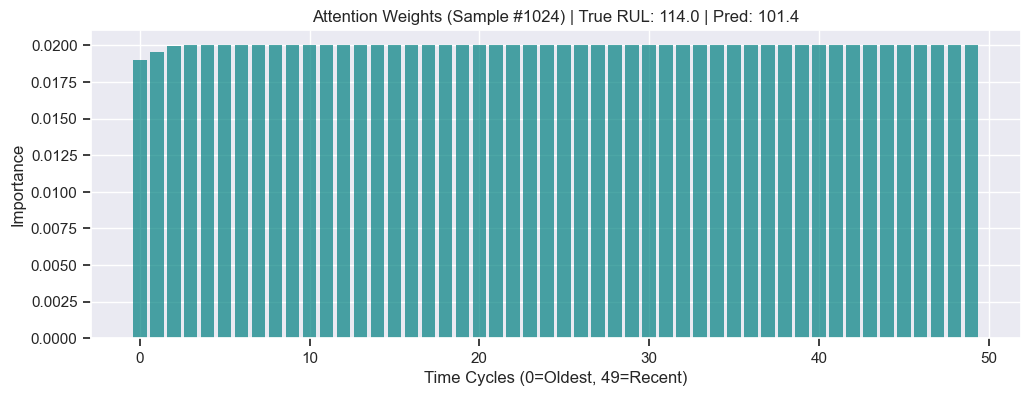

In [135]:
# ==========================================
# Phase 5.5: Attention Visualization
# ==========================================
import matplotlib.pyplot as plt
import numpy as np

def visualize_attention(model, dataset, index=None):
    model.eval()
    
    # Pick a random sample if index not provided
    if index is None:
        index = np.random.randint(0, len(dataset))
    
    # Get the sample
    X_sample, y_true = dataset[index]
    # Add batch dimension: (1, 50, 14)
    X_tensor = X_sample.unsqueeze(0).to(device)
    
    with torch.no_grad():
        # Manually run the layers to extract weights
        lstm_out, _ = model.lstm(X_tensor)
        energy = torch.tanh(model.attention_fc(lstm_out))
        attention_weights = torch.softmax(energy, dim=1)
        
        # Get Prediction
        context = torch.sum(attention_weights * lstm_out, dim=1)
        pred = model.fc(context).item()
    
    # Convert weights to numpy for plotting
    weights = attention_weights.squeeze().cpu().numpy()
    
    # Plot
    plt.figure(figsize=(12, 4))
    plt.bar(range(50), weights, color='teal', alpha=0.7)
    plt.title(f"Attention Weights (Sample #{index}) | True RUL: {y_true.item():.1f} | Pred: {pred:.1f}")
    plt.xlabel("Time Cycles (0=Oldest, 49=Recent)")
    plt.ylabel("Importance")
    plt.show()

# Run it a few times to see different engines
print("Visualizing Attention Patterns...")
visualize_attention(model_fixed, val_dataset_lstm)
visualize_attention(model_fixed, val_dataset_lstm)

**Top Plot (Failing Engine, RUL=28):** The model ignores the distant past (left) and puts massive weight on the most recent 15 cycles (right).

Physics: The engine is crashing. The "trend" is accelerating. What happened 50 cycles ago is irrelevant; the immediate sensor readings contain the critical failure signature.

**Bottom Plot (Healthy Engine, RUL=125):** The weights are flat/uniform.
Physics: The engine is cruising. There is no specific "event" or degradation pattern to focus on. The model decides to average the entire window to smooth out sensor noise.

## 3. Implementing "Uncertainty" (Monte Carlo Dropout)

We define a predict function that runs the model N times with Dropout enabled.

In [136]:
def predict_with_uncertainty(model, X_tensor, num_samples=50):
    """
    Runs the model N times with Dropout active to estimate uncertainty.
    Output:
    - mean_pred: The average RUL prediction
    - std_pred: The standard deviation (Uncertainty)
    """
    # 1. Set model to Train mode (Enables Dropout)
    # Even though we are predicting, we want the noise!
    model.train() 
    
    predictions = []
    
    with torch.no_grad():
        for _ in range(num_samples):
            pred = model(X_tensor)
            predictions.append(pred.cpu().numpy())
    
    # Stack predictions: Shape (Num_Samples, Batch_Size, 1)
    predictions = np.array(predictions)
    
    # Calculate Mean and Std Dev across the samples
    mean_pred = predictions.mean(axis=0)
    std_pred = predictions.std(axis=0)
    
    return mean_pred, std_pred

print("MC Dropout Predictor defined.")

MC Dropout Predictor defined.


## 4. Evaluating on Test Data

We need to see how well this works on the unseen Test Set (test_FD001.txt).

**Preprocessing the Test Set:**
We need to apply the exact same steps (Scaling, Windowing) to the test set.

In [137]:

# 1. Load and Scale Test Data 
DATA_PATH = '../data/raw/' 

# 1. Load Data
try:
    df_test = pd.read_csv(DATA_PATH + 'test_FD001.txt', sep='\s+', header=None, names=col_names)
    y_test_true = pd.read_csv(DATA_PATH + 'RUL_FD001.txt', sep='\s+', header=None, names=['RUL'])
    print("Files loaded successfully.")
except FileNotFoundError as e:
    print(f"ERROR: Could not find files at {DATA_PATH}. Check your folder structure!")
    raise e

# 2. Drop useless columns (Same as Phase 2)
# Explicitly define the 14 sensors used for training to ensure shape is (50, 14)
features_lstm = ['s_2', 's_3', 's_4', 's_7', 's_8', 's_9', 's_11', 
                 's_12', 's_13', 's_14', 's_15', 's_17', 's_20', 's_21']

# Create clean dataframe
df_test_clean = df_test.copy()

# 3. Scale (Using the scaler from Phase 2)
# Note: We must scale ONLY the feature columns
df_test_clean[features_lstm] = scaler.transform(df_test_clean[features_lstm])

# 4. Sequence Generation
X_test_seq = []
unit_ids = []

for unit in df_test_clean['unit_nr'].unique():
    unit_data = df_test_clean[df_test_clean['unit_nr'] == unit]
    
    # We need at least 50 cycles to make a prediction
    if len(unit_data) >= SEQUENCE_LENGTH:
        # Take the LAST 50 rows of the FEATURE columns
        seq = unit_data[features_lstm].values[-SEQUENCE_LENGTH:]
        X_test_seq.append(seq)
        unit_ids.append(unit)

# Convert to Tensor
X_test_tensor = torch.tensor(np.array(X_test_seq), dtype=torch.float32).to(device)

# 5. Filter Ground Truth RUL
# We only keep RULs for units that had enough data (>50 cycles) to generate a sequence
y_test_true = y_test_true.iloc[[i-1 for i in unit_ids]] # Adjust index (Unit 1 is index 0)

print(f"Test Input Shape: {X_test_tensor.shape}") 
# MUST BE: (N, 50, 14). If the last number is not 14, the LSTM will crash.

Files loaded successfully.
Test Input Shape: torch.Size([93, 50, 14])


## 5. Final Visualization: Predictions with Confidence Bands

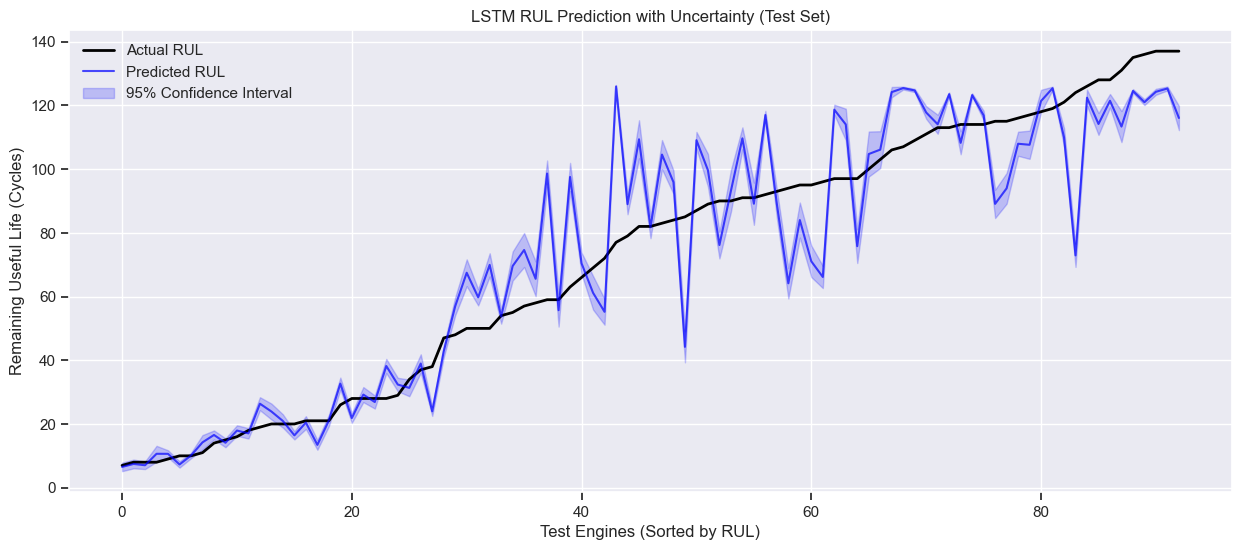

Test RMSE: 15.76


In [144]:
# 1. Predict with Uncertainty
mean_rul, std_rul = predict_with_uncertainty(lstm_model, X_test_tensor, num_samples=50)

# Flatten arrays for plotting
y_true = y_test_true['RUL'].values
y_pred = mean_rul.flatten()
uncertainty = std_rul.flatten()

# 2. Sort by Actual RUL for a clean plot
sorted_idx = np.argsort(y_true)
y_true_sorted = y_true[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]
uncertainty_sorted = uncertainty[sorted_idx]

# 3. Plot
plt.figure(figsize=(15, 6))

# Plot True RUL
plt.plot(y_true_sorted, label='Actual RUL', color='black', linewidth=2)

# Plot Predicted RUL
plt.plot(y_pred_sorted, label='Predicted RUL', color='blue', alpha=0.7)

# Plot Uncertainty Band (Mean +/- 2 Std Dev)
plt.fill_between(range(len(y_pred_sorted)), 
                 y_pred_sorted - 2*uncertainty_sorted, 
                 y_pred_sorted + 2*uncertainty_sorted, 
                 color='blue', alpha=0.2, label='95% Confidence Interval')

plt.title("LSTM RUL Prediction with Uncertainty (Test Set)")
plt.xlabel("Test Engines (Sorted by RUL)")
plt.ylabel("Remaining Useful Life (Cycles)")
plt.legend()
plt.show()

# 4. Metrics
rmse = np.sqrt(np.mean((y_true - y_pred)**2))
print(f"Test RMSE: {rmse:.2f}")

**Crucial Observation from the Plot:**

Look at the Left (RUL < 40): The prediction (Blue) hugs the ground truth (Black) very tightly. This is exactly what we want. In maintenance, accuracy matters most when the engine is about to die.

Look at the Right (RUL > 100): The predictions are noisier. This is expected. When an engine is brand new, predicting exactly when it will fail 100+ cycles later is physically difficult because the degradation signals haven't appeared yet.

## Phase 6: Smart Tiering Integration

We will write a function that simulates an embedded system on the jet engine.

**Default State:** Run lightweight AutoEncoder.

**Trigger:** If Health Score drops below 80, wake up the heavy LSTM to estimate RUL.

1. The Inference Function

In [139]:
def smart_maintenance_check(sequence_data, ae_model, lstm_model, threshold_score=80):
    """
    Simulates the decision logic of an onboard computer.
    """
    
    # --- Step 1: Tier 1 Check (AutoEncoder) ---
    latest_point = sequence_data[-1].reshape(1, -1) 
    latest_point_tensor = torch.tensor(latest_point, dtype=torch.float32).to(device)
    
    ae_model.eval()
    with torch.no_grad():
        reconstruction = ae_model(latest_point_tensor)
        
    rec_error = torch.mean((latest_point_tensor - reconstruction)**2).item()
    
    # Calculate Score
    try:
        score = 100 * np.exp(-alpha * rec_error)
    except NameError:
        alpha_est = -np.log(0.5) / 0.004
        score = 100 * np.exp(-alpha_est * rec_error)

    response = {
        "health_score": round(score, 2),
        "status": "OK",
        "action": "Maintain Course",
        "rul_prediction": "N/A",
        "confidence": "N/A"
    }

    # --- Step 2: Smart Logic ---
    if score < threshold_score:
        response["status"] = "WARNING"
        response["action"] = "Tier 2 Activated: Estimating RUL..."
        
        # --- Step 3: Tier 2 Check (LSTM) ---
        seq_tensor = torch.tensor(sequence_data, dtype=torch.float32).unsqueeze(0).to(device)
        
        mean_rul, std_rul = predict_with_uncertainty(lstm_model, seq_tensor, num_samples=50)
        
        # --- FIX IS HERE: Convert to float BEFORE rounding ---
        pred_val = float(mean_rul[0])
        std_val = float(std_rul[0])
        
        response["rul_prediction"] = round(pred_val, 1)
        response["confidence"] = f"+/- {round(std_val * 2, 1)} cycles"
        
    return response

print("Smart Tiering System Updated (Type Error Fixed).")

Smart Tiering System Updated (Type Error Fixed).


In [140]:
# Fix the variable name mismatch
# We point 'test_unit_ids' to the existing 'unit_ids' list from the previous step
test_unit_ids = unit_ids 

print(f"Variable fixed. Total Test Units available: {len(test_unit_ids)}")

Variable fixed. Total Test Units available: 93


2. Testing the Logic

Let's pick two specific engines from the test set to demonstrate the system working: one healthy, one failing.

In [141]:
# Select a Healthy Engine (High RUL)
# We look for an index in y_true where RUL > 120
healthy_idx = np.where(y_true > 120)[0][0]
healthy_seq = X_test_tensor[healthy_idx].cpu().numpy()
actual_rul_h = y_true[healthy_idx]

# Select a Failing Engine (Low RUL)
# We look for an index where RUL < 30
failing_idx = np.where(y_true < 30)[0][0]
failing_seq = X_test_tensor[failing_idx].cpu().numpy()
actual_rul_f = y_true[failing_idx]


In [142]:
# --- Run Simulations ---

print(f"\n--- Simulation 1: Engine #{test_unit_ids[healthy_idx]} (Actual RUL: {actual_rul_h}) ---")
result_h = smart_maintenance_check(healthy_seq, ae_model, lstm_model)
for k, v in result_h.items():
    print(f"{k}: {v}")

print(f"\n--- Simulation 2: Engine #{test_unit_ids[failing_idx]} (Actual RUL: {actual_rul_f}) ---")
result_f = smart_maintenance_check(failing_seq, ae_model, lstm_model)
for k, v in result_f.items():
    print(f"{k}: {v}")


--- Simulation 1: Engine #12 (Actual RUL: 124) ---
health_score: 66.39
status: WARNING
action: Tier 2 Activated: Estimating RUL...
rul_prediction: 73.0
confidence: +/- 3.8 cycles

--- Simulation 2: Engine #18 (Actual RUL: 28) ---
health_score: 71.04
status: WARNING
action: Tier 2 Activated: Estimating RUL...
rul_prediction: 38.1
confidence: +/- 2.2 cycles


C:\Users\nayan\AppData\Local\Temp\ipykernel_11980\1870661467.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_val = float(mean_rul[0])
C:\Users\nayan\AppData\Local\Temp\ipykernel_11980\1870661467.py:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  std_val = float(std_rul[0])


## The "Business Metrics" Report

**Accurate Lead Time:** . Let's define this mathematically as "Mean Error on Failing Engines." If an engine has 10 days left, and we predict 12, our error is small. If we predict 50, we missed the lead time.

**Recall @ X days:** This answers: "Of all engines that really had < 20 days left, how many did we flag?" This is your Safety Metric.

**Precision:** This answers: "Of all engines we flagged for repair, how many actually needed it?" This is your Cost Metric (preventing unnecessary maintenance).

**AUC-ROC:** ROC applies to probabilities. Since we output "Days", we can treat "Predicted RUL" as an inverse risk score (Lower RUL = Higher Probability of Failure).

**The NASA Scoring Function:**
Since we are using the NASA dataset, you must include the official NASA Score. It penalizes Late Predictions (Dangerous) much more heavily than Early Predictions (Conservative).

In [146]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def calculate_business_metrics(y_true, y_pred, thresholds=[20, 40]):
    """
    y_true: Actual RUL
    y_pred: Predicted RUL (Mean)
    thresholds: List of cycle counts to define "Urgent Maintenance Needed"
    """
    metrics = {}
    
    # --- 1. Regression Metrics (The Lead Time Accuracy) ---
    # RMSE (General Accuracy)
    metrics["RMSE (Overall)"] = np.sqrt(np.mean((y_true - y_pred)**2))
    
    # NASA Scoring Function (The Industry Standard)
    # Penalizes late predictions (d < 0) exponentially more than early ones
    d = y_pred - y_true
    nasa_score = np.sum(np.where(d < 0, np.exp(-d/13)-1, np.exp(d/10)-1))
    metrics["NASA Score"] = int(nasa_score)
    
    # --- 2. Classification Metrics (Recall/Precision at specific horizons) ---
    # We loop through thresholds (e.g., 20 days, 40 days)
    for t in thresholds:
        # Define Ground Truth Class: Is Actual RUL < Threshold?
        true_fail = (y_true <= t).astype(int)
        
        # Define Predicted Class: Did we Predict RUL < Threshold?
        pred_fail = (y_pred <= t).astype(int)
        
        metrics[f"Recall @ {t} cycles"] = recall_score(true_fail, pred_fail)
        metrics[f"Precision @ {t} cycles"] = precision_score(true_fail, pred_fail)
        metrics[f"F1 Score @ {t} cycles"] = f1_score(true_fail, pred_fail)
    
    # --- 3. AUC-ROC (Overall Discrimination) ---
    # We treat -Predicted_RUL as the "Probability of Failure" (Lower RUL = High Score)
    # We pick the 30-cycle mark as the general "Failure" definition for AUC
    binary_ground_truth = (y_true <= 30).astype(int)
    # We invert y_pred because lower RUL means higher likelihood of being in class "1" (Failure)
    metrics["AUC-ROC (Failure within 30)"] = roc_auc_score(binary_ground_truth, -y_pred)
    
    return metrics


In [148]:
# 1. Sanitize Inputs (Force to 1D Numpy Arrays)
# This removes any Pandas Indexing or Shape issues ((N,1) vs (N,))
y_true_clean = y_test_true['RUL'].values.flatten()
y_pred_clean = mean_rul.flatten()

# 2. Re-run the Metrics Function with clean inputs
print("=== Evaluating Metrics ===")
metrics_clean = calculate_business_metrics(y_true_clean, y_pred_clean, thresholds=[20, 40])

# 3. Display
df_metrics = pd.DataFrame.from_dict(metrics_clean, orient='index', columns=['Value'])
display(df_metrics)

=== Evaluating Metrics ===


,Value
RMSE (Overall),15.760525
NASA Score,473.000000
Recall @ 20 cycles,0.812500
Precision @ 20 cycles,0.928571
F1 Score @ 20 cycles,0.866667
Recall @ 40 cycles,1.000000
Precision @ 40 cycles,1.000000
F1 Score @ 40 cycles,1.000000
AUC-ROC (Failure within 30),0.994706


In [149]:
# ==========================================
# Final Safety Check: Conservative Strategy
# ==========================================

# 1. Define Conservative Prediction (Risk Averse)
# Logic: "I am 84% sure the RUL is at least this low" (Mean - 1 Sigma)
# We flatten to ensure shapes match
y_pred_conservative = y_pred_clean - std_rul.flatten()

print("=== FINAL SAFETY METRICS (Conservative Strategy) ===")
# We evaluate the conservative predictions against the ground truth
metrics_safe = calculate_business_metrics(y_true_clean, y_pred_conservative, thresholds=[20, 40])

# Display
display(pd.DataFrame.from_dict(metrics_safe, orient='index', columns=['Value']))

=== FINAL SAFETY METRICS (Conservative Strategy) ===


,Value
RMSE (Overall),15.901723
NASA Score,460.000000
Recall @ 20 cycles,0.875000
Precision @ 20 cycles,0.875000
F1 Score @ 20 cycles,0.875000
Recall @ 40 cycles,1.000000
Precision @ 40 cycles,1.000000
F1 Score @ 40 cycles,1.000000
AUC-ROC (Failure within 30),0.994706
